In [ ]:
! nvidia-smi

Fri Feb 24 10:05:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    50W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras
print(keras.__version__)

import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

2.11.0


# Preparing text data - 11.2

Deep learning models, being differentiable functions, can only process numeric tensors: they can’t take raw text as input. *Vectorizing text is the process of transforming text into numeric tensors*. Text vectorization processes come in many shapes and forms, but they all follow the same template:

1. Standardize the text to make it easier to process, such as by converting it to lowercase or removing punctuation.

2. Split the text into units (called tokens), such as characters, words, or groups of words. This is called tokenization.

3. Convert each such token into a numerical vector. This will usually involve
first indexing all tokens present in the data.


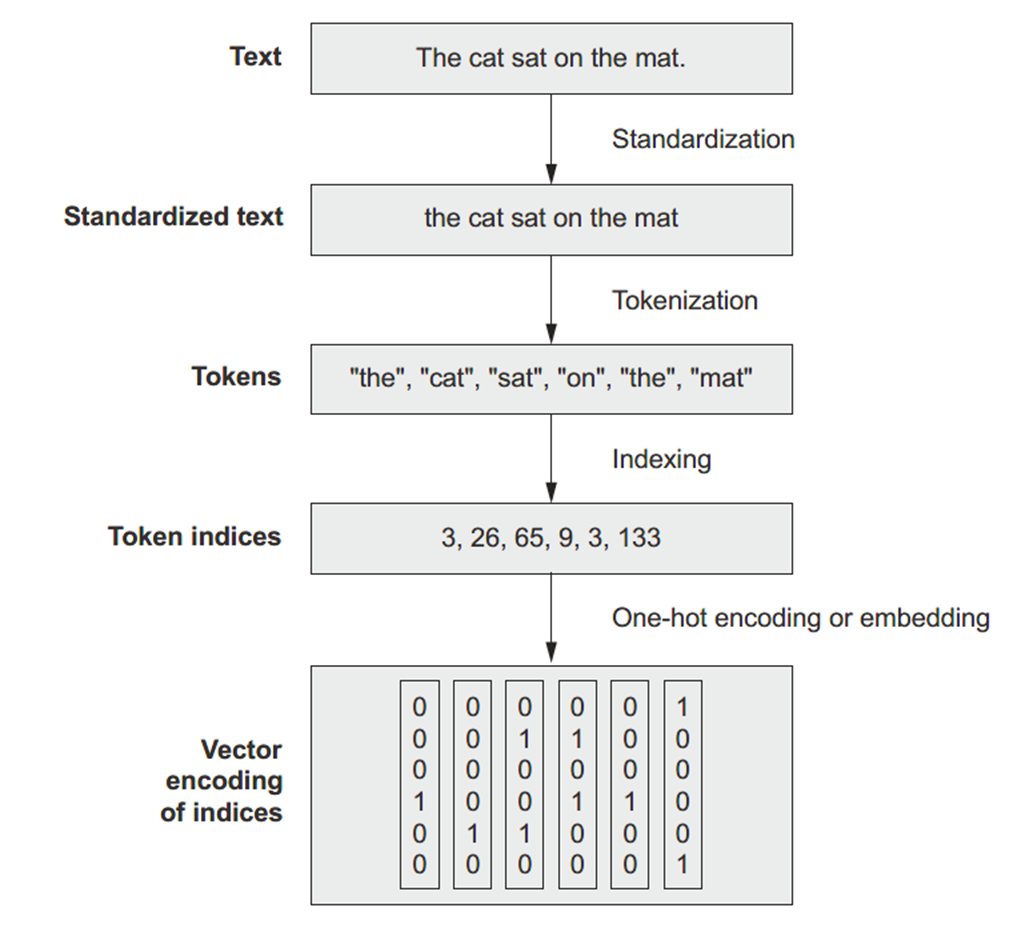






# Lab 07 Part 1: One-hot encoding of words or characters

This notebook contains the first code sample found in Chapter 11, Section 2 of the second edition of [Deep Learning with Python](https://livewarwickac-my.sharepoint.com/personal/u4044662_live_warwick_ac_uk/_layouts/15/onedrive.aspx?ct=1677224596483&or=OWA%2DNT&cid=05e8de17%2D0297%2D47c7%2D2e3a%2D65a32e595eeb&ga=1&id=%2Fpersonal%2Fu4044662%5Flive%5Fwarwick%5Fac%5Fuk%2FDocuments%2F2023%20IM931%20Interdisciplinary%20Machine%20Learning%2FChollet%20BOOK%202022%20Deep%20Learning%20with%20Python%202nd%20Edition%2Epdf&parent=%2Fpersonal%2Fu4044662%5Flive%5Fwarwick%5Fac%5Fuk%2FDocuments%2F2023%20IM931%20Interdisciplinary%20Machine%20Learning). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

**One-hot encoding** is a widely used format for **encoding categorical data**, also called *categorical encoding*. You already saw it in action in our initial IMDB and Reuters examples from chapter 3 (done with words, in our case). It consists in associating a unique integer index to every word, then *turning this integer index i into a binary vector of size N*, the size of the vocabulary, that would be all-zeros except for the i-th entry, which would be 1.

Of course, one-hot encoding *can be done at the character level as well*. To unambiguously drive home what one-hot encoding is and how to implement it, here are two toy examples of one-hot encoding: one for words, the other for characters.



Word level one-hot encoding (toy example):

In [ ]:
import numpy as np

# This is our initial data; one entry per "sample"
# (in this toy example, a "sample" is just a sentence, but
# it could be an entire document).
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# First, build an index of all tokens in the data.
token_index = {}
for sample in samples:
    # We simply tokenize the samples via the `split` method.
    # **in real life, we would also strip punctuation and special characters
    # from the samples.
    for word in sample.split():
        if word not in token_index:
            # Assign a unique index to each unique word
            token_index[word] = len(token_index) + 1          #advance index by 1
            # Note that we don't attribute index 0 to anything.

# Next, we vectorize our samples.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [ ]:
print(token_index)
print(sample.split())
print(len(samples))
#print(results)
print(index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}
['The', 'dog', 'ate', 'my', 'homework.']
2
10


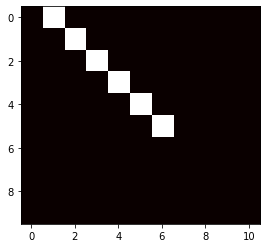

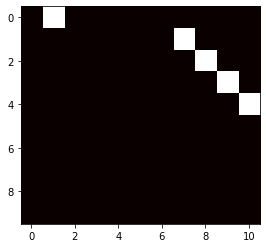

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(results[0,], cmap='hot', interpolation='nearest')
plt.show()

plt.imshow(results[1,], cmap='hot', interpolation='nearest')
plt.show()

Character level one-hot encoding (toy example)

In [ ]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # All printable ASCII characters.
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [ ]:
print(len(samples))
print(token_index)
print(characters)
print(character)
print(index)
print(results)

2
{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}
0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 

**Note** that Keras has built-in utilities for doing one-hot encoding text at the word or character level, starting from raw text data. This is what you should actually be using, as it will take care of a number of important features, such as stripping special characters from strings, or only taking into the top N most common words in your dataset (a common restriction to avoid dealing with very large input vector spaces).


**Using Keras for word-level one-hot encoding**

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take
# into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)
# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than use one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [ ]:
print(sequences)
print(one_hot_results)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]



A variant of one-hot encoding is the so-called `"one-hot hashing trick"`, which can be *used when the number of unique tokens in your vocabulary is too large to handle explicitly.* Instead of explicitly assigning an index to each word and keeping a reference of these indices in a dictionary, one may hash words into vectors of fixed size. This is typically done with a very lightweight hashing function.

The main advantage of this method is that it does away with maintaining an explicit word index, which *saves memory* and allows online encoding of the data (starting to generate token vectors right away, before having seen all of the available data). The one drawback of this method is that it is susceptible to `"hash collisions"`: two different words may end up with the same hash,
and subsequently any machine learning model looking at these hashes won't be able to tell the difference between these words. The likelihood of hash collisions decreases when the dimensionality of the hashing space is much larger than the total number of unique tokens being hashed.

Word-level one-hot encoding with hashing trick (toy example):

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We will store our words as vectors of size 1000.
# Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which
# will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        print(word)
        # Hash the word into a "random" integer index
        # that is between 0 and 1000
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

The
cat
sat
on
the
mat.
The
dog
ate
my
homework.


In [ ]:
print(index)
print(results.shape)

755
(2, 10, 1000)


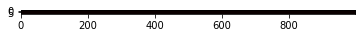

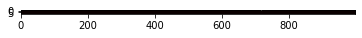

In [ ]:
plt.imshow(results[0,0:100,], cmap='hot', interpolation='nearest')
plt.show()

plt.imshow(results[1,0:100], cmap='hot', interpolation='nearest')
plt.show()

# Lab 07 Part 2: Understanding recurrent neural networks - 10.3.1

A major characteristic of all neural networks you’ve seen so far, such as densely connected networks and convnets, is that they have no memory, i.e., *feedforward networks*. Each input shown to them is processed independently, with no state kept between inputs.

**A recurrent neural network (RNN) adopts the same principle used in biological intelligence**, where information is processed incrementally while maintaining an internal model of what is being processing, built from past information and constantly updated as new information comes in. RNNs process *sequences* by iterating through the sequence elements and by maintaining a state that contains information relative to what it has seen so far. In effect, an RNN is a type of neural network that has an internal loop (see figure 10.6) in book chapter.

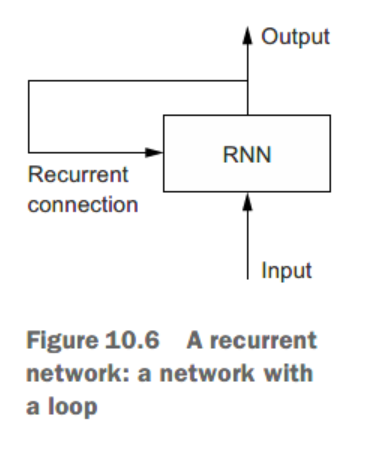


The state of the RNN is reset between processing two different,
independent sequences (such as two samples in a batch), where one sequence is considered to be a single input to the network, which is no longer processed in a single step; rather, the network internally loops over sequence elements.

To make these notions of *loop* and *state* clear, we will implement the *forward pass* of a toy RNN. This RNN takes as input a sequence of vectors encoded as rank-2 tensors of size (timesteps, input_features). It loops over timesteps, and at each timestep, considers its current state and the input at time t (of shape (input_features,), and combines both to obtain the output at t. The state for the next step is then set to be this previous output. For the first timestep, the previous output isn’t defined;
hence, there is no current state. So we’ll initialize the state as an all-zero vector called the *initial state* of the network.

To make these notions absolutely unambiguous, let’s write a naive NumPy implementation of the forward pass of the simple RNN as follows:

In [ ]:
# NumPy implementation of a simple RNN

timesteps = 100        #number of timesteps in the input sequence
input_features = 32    #dimensionality of the input feature space
output_features = 64   #dimensionality of the output feature space

inputs = np.random.random((timesteps, input_features))   #input data: random noise for the sake of the example
state_t = np.zeros((output_features,))                  #initial state: an all-zero vector

# The next steps creates random weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))
successive_outputs = []                                  #

for input_t in inputs:                    #input_t is a vector of shape (input_features,).

  # Combines the input with the current state (the previous
  # output) to obtain the current output. We use tanh to add
  # non-linearity (we could use any other activation function).
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

  successive_outputs.append(output_t)            #stores this output in a list
  state_t = output_t                            #updates the state of the network for the next timestep

#The final output is a rank-2 tensor of shape (timesteps,output_features).
final_output_sequence = np.stack(successive_outputs, axis=0)


In [ ]:
print(final_output_sequence.shape)
print(final_output_sequence[1:3])


(100, 64)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In other words, an RNN is a for loop that reuses quantities computed during the previous iteration of the loop, nothing more. There are many different RNNs fitting this definition that you could build. This example is one of the simplest RNN formulations.

**NOTE:** In this example, the final output is a rank-2 tensor of shape (timesteps, output_features), where each timestep is the output of the loop at time t. Each timestep t in the output tensor contains information about timesteps 0 to t in the input sequence—about the entire past. For this reason, in many cases, you don’t need this full sequence of outputs; you just need the
last output (output_t at the end of the loop), because it already contains information about the entire sequence.

You can think of timesteps as observations


## A first recurrent layer in Keras

The process we just naively implemented in NumPy corresponds to an actual Keras layer—the `SimpleRNN layer`. There is one minor difference however: `SimpleRNN` processes batches of sequences, like all other Keras layers. This means that it takes inputs of shape `(batch_size, timesteps, input_features)`, rather than `(timesteps, input_features)`. When specifying the shape argument of the initial Input(), **note** that you can set the timesteps entry to `None`, which enables your network to process sequences of arbitrary length.


In [ ]:
# An RNN layer that can process sequences of any length
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import SimpleRNN

num_features = 14
inputs = keras.Input(shape=(None, num_features))
outputs = layers.SimpleRNN(16)(inputs)
print(outputs.shape)


## You can use the below code if preferable, but make sure you import the 'Sequential' model & 'Embedding' layer.

#from keras.models import Sequential
#from keras.layers import Embedding

#model = Sequential()
#model.add(Embedding(10000, 16))
#model.add(SimpleRNN(16), return_sequences=True))
#model.summary()


(None, 16)


This is especially useful if your model is meant to process sequences of variable length. However, if all of your sequences have the same length, I recommend specifying a complete input shape, since it enables `model.summary()` to display output length
information, which is always nice, and it can unlock some performance optimizations.

Like all recurrent layers in Keras (i.e., `SimpleRNN`, `LSTM`, and `GRU`), `SimpleRNN` can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape `(batch_size, timesteps, output_features)`), or it can return only the last output for each input sequence (a 2D tensor of shape `(batch_size, output_features)`). These two modes are controlled by the `return_sequences` constructor argument.

Let's take a look at an example that uses SimpleRNN and returns only the output at the last timestep:



In [ ]:
# An RNN layer that returns only its last output step

steps = 120
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=False)(inputs)
print(outputs.shape)


(None, 16)


**Note** that `return_sequences=False` is the default.


The next example returns the full state sequence:


In [ ]:
# An RNN layer that returns its full output sequence
inputs = keras.Input(shape=(steps, num_features))
outputs = layers.SimpleRNN(16, return_sequences=True)(inputs)
print(outputs.shape)


(None, 120, 16)


It’s sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to set all intermediate layers to return a full sequence of outputs as follows:
:

In [ ]:
# Stacking RNN layers
inputs = keras.Input(shape=(steps, num_features))
x = layers.SimpleRNN(16, return_sequences=True)(inputs)
x = layers.SimpleRNN(16, return_sequences=True)(x)
outputs = layers.SimpleRNN(16)(x)   # This last layer only returns the last outputs.
print(outputs.shape)

## You can use the below format if preferable, but make sure you import the sequential model
#model = Sequential()
#model.add(Embedding(10000, 32))
#model.add(SimpleRNN(16, return_sequences=True))
#model.add(SimpleRNN(16, return_sequences=True))
#model.add(SimpleRNN(16, return_sequences=True))
#model.add(SimpleRNN(16))  # This last layer only returns the last outputs.
#model.summary()

(None, 16)


In practice, you’ll rarely work with the `SimpleRNN` layer because it’s generally too simplistic and has a major issue linked to the *vanishing gradient problem*, where as you keep adding layers to a
network, the network eventually becomes untrainable - an effect  similar to what is observed with non-recurrent networks
(feedforward networks) that are many layers deep.

Now let's try to use such a model on the IMDB movie review classification problem. First, let's preprocess the data:

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
print(tf. __version__)

In [ ]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')

input_train = tf.keras.utils.pad_sequences(input_train, maxlen=maxlen)
input_test = tf.keras.utils.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
#from keras.layers import Embedding

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 71s 413ms/step - loss: 0.5596 - accuracy: 0.7055 - val_loss: 0.4221 - val_accuracy: 0.8172
Epoch 2/10
157/157 [==============================] - 60s 384ms/step - loss: 0.3639 - accuracy: 0.8457 - val_loss: 0.3866 - val_accuracy: 0.8282
Epoch 3/10
157/157 [==============================] - 57s 363ms/step - loss: 0.2838 - accuracy: 0.8882 - val_loss: 0.3967 - val_accuracy: 0.8372
Epoch 4/10
157/157 [==============================] - 54s 347ms/step - loss: 0.2472 - accuracy: 0.9060 - val_loss: 0.3299 - val_accuracy: 0.8626
Epoch 5/10
157/157 [==============================] - 55s 350ms/step - loss: 0.2103 - accuracy: 0.9201 - val_loss: 0.4517 - val_accuracy: 0.8508
Epoch 6/10
157/157 [==============================] - 53s 337ms/step - loss: 0.1822 - accuracy: 0.9325 - val_loss: 0.4546 - val_accuracy: 0.8572
Epoch 7/10
157/157 [==============================] - 51s 326ms/step - loss: 0.1515 - accuracy: 0.9452 - val_loss: 0.3874 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


Let's display the training and validation loss and accuracy:

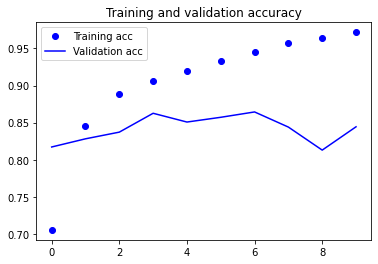

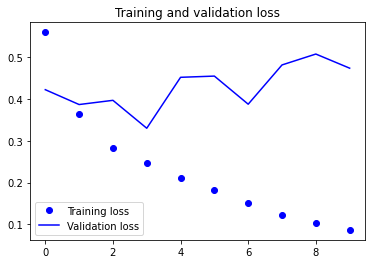

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As a reminder, our very first naive approach to this very dataset got us to about 88% test accuracy. Unfortunately, our small
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is that our inputs only consider the first 500 words rather the full sequences -- hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences (due to some reasons mentioned earlier), like text. Other types of recurrent layers perform much better. Let's take a look at some more advanced layers.

## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a `LSTM layer` and train it on the `IMDB data`. Here's the network, similar to the one with `SimpleRNN` that we just presented. We only specify the output dimensionality of the `LSTM layer`, and leave every other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you having to spend time tuning parameters by hand.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

In [ ]:
model.summary()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Lab 07 Part 3: Advanced usage of recurrent neural networks - 10.4

This notebook contains the code samples found in Chapter 10, Section 10.4 of the second edition of the book - *Deep Learning with Python*. Note that the original text features far more content, in particular, further explanations and figures. In this notebook, you will only find source code and related comments.

---

In this section, we will review three advanced techniques for improving the performance and generalization power of recurrent neural networks. By the end of the section, you will know most of what there is to know about using recurrent networks with Keras. We will demonstrate all three concepts on a weather forecasting problem, where we have access to a timeseries of data points coming from sensors installed on the roof of a building, such as temperature, air pressure, and humidity, which we use to predict what the temperature will be 24 hours after the last data point collected. This is a fairly challenging problem that exemplifies many common difficulties encountered when working with timeseries.

The following techniques will be covered:

* *Recurrent dropout*, a specific, built-in way to use dropout to fight overfitting in recurrent layers.
* *Stacking recurrent layers*, to increase the representational power of the network (at the cost of higher computational loads).
* *Bidirectional recurrent layers*, which presents the same information to a recurrent network in different ways, increasing accuracy and mitigating forgetting issues.

## A temperature forecasting problem

Until now, the only sequence data we have covered has been text data, for instance the IMDB dataset and the Reuters dataset. But sequence
data is found in many more problems than just language processing. In all of our examples in this section, we will be playing with a weather
timeseries dataset recorded at the Weather Station at the Max-Planck-Institute for Biogeochemistry in Jena, Germany: http://www.bgc-jena.mpg.de/wetter/.

In this dataset, fourteen different quantities (such air temperature, atmospheric pressure, humidity, wind direction, etc.) are recorded
every ten minutes, over several years. The original data goes back to 2003, but we limit ourselves to data from 2009-2016. This dataset is
perfect for learning to work with numerical timeseries. We will use it to build a model that takes as input some data from the recent past (a
few days worth of data points) and predicts the air temperature 24 hours in the future.

In [ ]:
# Download data
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

Let's take a look at the data:

In [ ]:
# Create path to file

import os
fname = os.path.join("jena_climate_2009_2016.csv")
print(fname)

In [ ]:
# Read and inspect data

with open(fname) as f:
  data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]

In [ ]:
print(header)
print(len(header))
print(len(lines))

This outputs a count of 420,551 lines of data (each line is a timestep: a record of a date and 14 weather-related values), as well as the header.

We will now convert all 420,551 lines of data into NumPy arrays: one array for the temperature (in degrees Celsius) - the target column, and another one for the rest of the data — the features we will use to predict future temperatures.

**Note** that we discarded the “Date Time” column.


In [ ]:
# Parsing the data
import numpy as np

temperature = np.zeros((len(lines),))    #create a zero-filled vector array to store temperature values
raw_data = np.zeros((len(lines), len(header) - 1))  #do same for features

for i, line in enumerate(lines):
  values = [float(x) for x in line.split(",")[1:]]
  temperature[i] = values[1]           #we store column 1 in the “temperature” array.
  raw_data[i, :] = values[:]          #we store all columns (including the temperature) in the “raw_data” array.

#print(raw_data[:2,:-1])    #print the first two rows of data

In [ ]:
print(raw_data[0])

In [ ]:
# Visualise with Pandas
import pandas as pd
df_jena = pd.read_csv('jena_climate_2009_2016.csv')
df_jena.head()

For instance, here is the plot of temperature (in degrees Celsius) over time:

In [ ]:
# Plotting the temperature timeseries
plt.plot(range(len(temperature)), temperature)
plt.ylabel('Temperature Values')
plt.xlabel('Observations')
plt.tight_layout()


The plot shows the variation of temperature values (in degrees Celsius) over time. You can clearly see the yearly periodicity of temperature — the data spans 8 years.

Below is a narrower plot of the first ten days of temperature data (since the data is recorded every ten minutes, we get 144 data points per day):

In [ ]:
plt.plot(range(1440), temperature[:1440])
plt.ylabel('Temperature Values')
plt.xlabel('Observations');


On this plot, you can see daily periodicity, especially evident for the last 4 days. We can also note that this ten-days period must be
coming from a fairly cold winter month.

If we were trying to predict average temperature for the next month given a few month of past data, the problem would be easy, due to the
reliable year-scale periodicity of the data. But looking at the data over a scale of days, the temperature looks a lot more chaotic. So is
this timeseries predictable at a daily scale? Let's find out.

When working with timeseries data, it’s important to use validation and test data that is more recent than the training data, because you’re trying to predict the future given the past, not the reverse, and your validation/test splits should reflect that.

In [ ]:
# Computing the number of samples we’ll use for each data split

num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

In [ ]:
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

## Preparing the data


The exact formulation of our problem will be the following: given data going as far back as `lookback` timesteps (a timestep is 10 minutes) and sampled every `steps` timesteps, can we predict the temperature in `delay` timesteps?

We’ll normalize each timeseries independently so that they all take small values on a similar scale. We’re going to use the first 210,225 timesteps as training data, so we’ll compute the mean and standard deviation only on this fraction of the data.



In [ ]:
# Normalizing the data
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

Next, let’s create a Dataset object that yields batches of data from the past five days along with a target temperature 24 hours in the future. Because the samples in the dataset are highly redundant (`sample N` and `sample N + 1` will have most of their timesteps in common), it would be wasteful to explicitly allocate memory for every sample. Instead, we’ll generate the samples on the fly while only keeping in memory the original raw_data and temperature arrays, and nothing more. We could easily write a Python generator to do this, but there’s a built-in dataset utility in Keras that does just that  (`timeseries_dataset_from_array()`), so we can save ourselves some work by using it. You can generally use it for any kind of timeseries forecasting.

We’ll use `timeseries_dataset_from_array()` to instantiate three datasets: one for training, one for validation, and one for testing. We’ll use the following parameter values:
1. sampling_rate = 6—Observations will be sampled at one data point per hour:
we will only keep one data point out of 6.
2. sequence_length = 120—Observations will go back 5 days (120 hours).
3. delay = sampling_rate * (sequence_length + 24 - 1) — The target for a sequence will be the temperature 24 hours after the end of the sequence.

When making the training dataset, we’ll pass `start_index = 0 and end_index = num_train_samples` to only use the first 50% of the data. For the validation dataset, we’ll pass `start_index = num_train_samples and end_index = num_train_samples + num_val_samples` to use the next 25% of the data. Finally, for the test dataset, we’ll pass `start_index = num_train_samples + num_val_samples` to use the remaining samples.


In [ ]:
# Instantiating datasets for training, validation, and testing
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [ ]:
# Inspecting the output of one of our datasets
for samples, targets in train_dataset:
  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break


***Data Generator***

In case you're interested in creating a *data generator* yourself, you can adapt the code below for your specific purpose.  It yields a tuple `(samples, targets)`, where `samples` is one batch of input data and `targets` is the corresponding array of target temperatures. It takes the following arguments:

* `data`: The original array of floating point data, which we just normalized in the code snippet above.
* `lookback`: How many timesteps back should our input data go.
* `delay`: How many timesteps in the future should our target be.
* `min_index` and `max_index`: Indices in the `data` array that delimit which timesteps to draw from. This is useful for keeping a segment of the data for validation and another one for testing.
* `shuffle`: Whether to shuffle our samples or draw them in chronological order.
* `batch_size`: The number of samples per batch.
* `step`: The period, in timesteps, at which we sample data. We will set it 6 in order to draw one data point every hour.

**PLEASE DO NOT RUN NEXT CELL!**

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

## A common sense, non-machine learning baseline


Before we start using black-box deep learning models to solve the temperatureprediction problem, let’s try a simple, common-sense approach. It will serve as a sanity check, and it will establish a baseline that we’ll have to beat in order to demonstrate the usefulness of more-advanced machine learning models. Such common-sense baselines can be useful when you’re approaching a new problem for which there is no known solution (yet). A classic example is that of unbalanced classification tasks, where some classes are much more common than others. If your dataset contains 90% instances of class A and 10% instances of class B, then *a common-sense approach to the classification task is to always predict “A” when presented with a new sample.* Such a classifier is 90% accurate overall, and any learning-based approach should therefore beat this 90% score in order to demonstrate usefulness. Sometimes, such elementary baselines can prove surprisingly hard to beat.


In this case, the temperature timeseries can safely be assumed to be continuous
(the temperatures tomorrow are likely to be close to the temperatures today) as
well as periodical with a daily period. Thus a common-sense approach is to always predict that the temperature 24 hours from now will be equal to the temperature right now. Let’s evaluate this approach, using the mean absolute error (MAE) metric, defined as follows:

`np.mean(np.abs(preds - targets))`


In [ ]:
# Computing the common-sense baseline MAE
def evaluate_naive_method(dataset):
  total_abs_err = 0.
  samples_seen = 0
  for samples, targets in dataset:
    preds = samples[:, -1, 1] * std[1] + mean[1]
    total_abs_err += np.sum(np.abs(preds - targets))
    samples_seen += samples.shape[0]
  return total_abs_err / samples_seen

print(f"Validation MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"Test MAE: {evaluate_naive_method(test_dataset):.2f}")


For variable `preds`, the temperature feature is at column 1, so `samples[:, -1, 1]` is the last temperature measurement in the input sequence. Recall that we normalized our features, so to retrieve a temperature in degrees Celsius, we need to un-normalize it by multiplying it by the standard deviation and adding back the mean.

This common-sense baseline achieves a validation MAE of 2.44 degrees Celsius and a test MAE of 2.62 degrees Celsius. So if you always assume that the temperature 24 hours in the future will be the same as it is now, you will be off by two and a half degrees on average.

## A basic machine learning approach

In the same way that it’s useful to establish a common-sense baseline before trying machine learning approaches, it’s useful to try simple, cheap machine learning models (such as small, densely connected networks) before looking into complicated and computationally expensive models such as RNNs. This is the best way to make sure any further complexity you throw at the problem is legitimate and delivers real benefits.

The following code shows a fully connected model that starts by flattening the data and then runs it through two Dense layers. **Note the lack of an activation function on the last Dense layer, which is typical for a regression problem.** We use mean squared error (MSE) as the loss, rather than MAE, because unlike MAE, it’s smooth around zero, which is a useful property for gradient descent. We will monitor MAE by adding it as a metric in compile().


**Densely Connected Model**

In [ ]:
# Training and evaluating a densely connected model
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Flatten()(inputs)
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

# Use a callback to save the bestperforming model.
callbacks = [keras.callbacks.ModelCheckpoint("jena_dense.keras", save_best_only=True)]

# Compile model
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

# Train model
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

# Reload the best model and evaluate it on the test data.
model = keras.models.load_model("jena_dense.keras")

print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Let's display the loss curves for validation and training:

In [ ]:
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

This shows the training and validation MAE on the Jena temperature forecasting task with a simple, densely connected network.

Some of the validation losses are close to the no-learning baseline, but not reliably. This goes to show the merit of having this baseline in the first place: it turns out to be not easy to outperform. Your common sense contains a lot of valuable information to which a machine learning model doesn’t have access.

You may wonder, if a simple, well-performing model exists to go from the data tothe targets (the common-sense baseline), why doesn’t the model you’re training find it and improve on it? Well, the space of models in which you’re searching for a solution — that is, your hypothesis space—is the space of all possible two-layer networks with the configuration you defined. The common-sense heuristic is just one model among millions that can be represented in this space. It’s like looking for a needle in a haystack. Just because a good solution technically exists in your hypothesis space doesn’t mean you’ll be able to find it via gradient descent.

That’s a pretty significant limitation of machine learning in general: unless the learning algorithm is hardcoded to look for a specific kind of simple model, it can sometimes fail to find a simple solution to a simple problem. That’s why leveraging good feature engineering and relevant architecture priors is essential: you need to precisely tell your model what it should be looking for.


**1D Convolutional Model**

Speaking of leveraging the right *architecture priors*, since our input sequences feature daily cycles, perhaps a convolutional model could work. A temporal convnet could reuse the same representations across different days, much like a spatial convnet can reuse the same representations across different locations in an image. You already know about the `Conv2D` and `SeparableConv2D` layers, which see their inputs through small windows that swipe across 2D grids. There are also 1D and even 3D versions of these layers: `Conv1D`, `SeparableConv1D`, and `Conv3D`. The Conv1D layer relies on 1D windows that slide across *input sequences*, and the Conv3D layer relies on
cubic windows that slide across *input volumes*.

You can thus build 1D convnets, strictly analogous to 2D convnets. They’re a great fit for any sequence data that follows the translation invariance assumption (meaning that if you slide a window over the sequence, the content of the window should follow the same properties independently of the location of the window). Let’s try one on our temperature-forecasting problem.

We’ll pick an initial window length of 24, so that we look at 24 hours of data at a time (one cycle). As we downsample the sequences (via MaxPooling1D layers), we’ll reduce the window size accordingly:


In [ ]:
# Build a 1D convolutional model

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")

print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Again, we will plot the training and validation curves.

In [ ]:
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

This model performs even worse than the densely connected one, only achieving a validation MAE of about 2.9 degrees, far from the common-sense baseline. What went wrong here? Two things:

- First, weather data doesn’t quite respect the translation invariance assumption. While the data does feature daily cycles, data from a morning follows different properties than data from an evening or from the middle of the night. Weather data is only translation-invariant for a very specific timescale.
- Second, order in our data matters—a lot. The recent past is far more informative for predicting the next day’s temperature than data from five days ago. A 1D convnet is not able to leverage this fact. In particular, our max pooling and global average pooling layers are largely destroying order information.


## A first recurrent baseline


Neither the fully connected approach nor the convolutional approach did well, but that doesn’t mean machine learning isn’t applicable to this problem. The densely connected approach first flattened the timeseries, which removed the notion of time from the input data. The convolutional approach treated every segment of the data in the same way, even applying pooling, which destroyed order information. Let’s instead look at the data as what it is: a sequence, where causality and order matter.

There’s a family of neural network architectures designed specifically for this use case: recurrent neural networks. Among them, the Long Short Term Memory (LSTM) layer has long been very popular. We’ll see in a minute how these models work, but let’s start by giving the LSTM layer a try.


In [ ]:
# Building a simple LSTM-based model
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
    ]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
epochs=10,
validation_data=val_dataset,
callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")


Let's plot the results:

In [ ]:
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

Here we achieved a validation MAE as low as 2.36 degrees and a test MAE of 2.55 degrees. The LSTM-based model can finally beat the common-sense baseline (albeit just by a bit, for now), demonstrating the value of machine learning on this task.

**Note** that we omitted epoch 1 on this graph, because the high training MAE (7.75) at epoch 1 would distort the scale.

Our next task will be to understand why the LSTM model performed remarkably better than the convnet and densely connected network. We shall also further refine the model using some advanced steps.



## Using recurrent dropout to fight overfitting


It is evident from our training and validation curves that our model is overfitting: the training and validation losses start diverging considerably after a few epochs. You are already familiar with a classic technique for fighting this phenomenon: *dropout, consisting in randomly zeroing-out input units of a layer in order to break happenstance correlations in the training data that the layer is exposed to*.How to correctly apply dropout in recurrent networks, however, is not a trivial question. **It has long been known that applying dropout before a recurrent layer hinders learning rather than helping with regularization**.

In 2015, Yarin Gal, as part of his Ph.D. thesis on
Bayesian deep learning, determined the proper way to use dropout with a recurrent network: the same dropout mask (the same pattern of dropped units) should be applied at every timestep, instead of a dropout mask that would vary randomly from timestep to timestep. What's more, in order to regularize the representations formed by the recurrent gates of layers such as `GRU` and `LSTM`, a temporally constant dropout mask should be applied to the inner recurrent activations of the layer (*a "recurrent" dropout mask*). Using the same dropout mask at every timestep allows the network to properly propagate its learning error through time; a temporally random dropout mask would instead disrupt this error signal and be harmful to the learning process.

Yarin Gal did his research using Keras and helped build this mechanism directly into Keras recurrent layers. Every recurrent layer in Keras has two dropout-related arguments: `dropout`, a float specifying the dropout rate for input units of the layer, and `recurrent_dropout`, specifying the dropout rate of the recurrent units. Let's add recurrent dropout to to the `LSTM layer` of our first `LSTM` example and see how doing so impacts overfitting.

Dropout reduces the need to rely as much on network size for regularization, so we’ll use an `LSTM layer` with twice as many units. Because networks being regularized with dropout always take longer to fully converge, we train our network for twice as many
epochs.

In [ ]:
# Training and evaluating a dropout-regularized LSTM

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.Dropout(0.5)(x)         #To regularize the Dense layer, we also add a Dropout layer after the LSTM
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
    ]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)


In [ ]:
display(history)

In [ ]:
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

Great success; we are no longer overfitting during the first 20 epochs. However, while we have more stable evaluation scores, our best scores are not much lower than they were previously.

## Stacking recurrent layers

Since we are no longer overfitting yet we seem to have hit a performance bottleneck, we should start considering increasing the capacity of
our network. If you remember our description of the "universal machine learning workflow": it is a generally a good idea to increase the
capacity of your network until overfitting becomes your primary obstacle (assuming that you are already taking basic steps to mitigate
overfitting, such as using dropout). As long as you are not overfitting too badly, then you are likely under-capacity.

Increasing network capacity is typically done by increasing the number of units in the layers, or adding more layers. Recurrent layer
stacking is a classic way to build more powerful recurrent networks: for instance, what currently powers the Google translate algorithm is
a stack of seven large LSTM layers -- that's huge.

To stack recurrent layers on top of each other in Keras, all intermediate layers should return their full sequence of outputs (a 3D tensor)
rather than their output at the last timestep. This is done by specifying `return_sequences=True`:

In [ ]:
# Training and evaluating a dropout-regularized, stacked GRU model
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.GRU(32, recurrent_dropout=0.5, return_sequences=True)(inputs)
x = layers.GRU(32, recurrent_dropout=0.5)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [keras.callbacks.ModelCheckpoint("jena_stacked_gru_dropout.keras",
                                    save_best_only=True)]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_stacked_gru_dropout.keras")

print(f"Test MAE: {model.evaluate(test_dataset)[1]:.2f}")

Let's take a look at our results:

In [ ]:
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

We have achieved a test MAE of 2.39 degrees (an 8.8%
improvement over the baseline). You can see that the added layer does improve the results a bit, though not dramatically. You may be seeing diminishing returns from increasing network capacity at this point.


## Using bidirectional RNNs


The last technique that we will introduce in this section is called "bidirectional RNNs". A bidirectional RNN is common RNN variant which
can offer higher performance than a regular RNN on certain tasks. It is frequently used in natural language processing.

RNNs are notably order-dependent, or time-dependent: they process the timesteps of their input sequences in order, and shuffling or
reversing the timesteps can completely change the representations that the RNN will extract from the sequence. This is precisely the reason
why they perform well on problems where order is meaningful, such as our temperature forecasting problem. A bidirectional RNN exploits
the order-sensitivity of RNNs: it simply consists of two regular RNNs, such as the GRU or LSTM layers that you are already familiar with,
each processing input sequence in one direction (chronologically and antichronologically), then merging their representations. By
processing a sequence both way, a bidirectional RNN is able to catch patterns that may have been overlooked by a one-direction RNN.

Remarkably, the fact that the RNN layers in this section have so far processed sequences in chronological order (older timesteps first) may
have been an arbitrary decision. At least, it's a decision we made no attempt at questioning so far. Could it be that our RNNs could have
performed well enough if it were processing input sequences in antichronological order, for instance (newer timesteps first)? Let's try
this in practice and see what we get. All we need to do is write a variant of our **data generator**, where the input sequences get reverted
along the time dimension (replace the last line with `yield samples[:, ::-1, :], targets`). Training the same one-GRU-layer network as we
used in the first experiment in this section, we get the following results:

**NOTE:** This is an older code and it may not necessarily work outright, so you may need to adjust it a bit. Compare this to the first data generator function to identify the major changes in the code that is making it work in reverse order. Next, use the function to build the an `LSTM network` trained on reversed sequences and plot the training and validation loss .

**PLEASE DO NOT RUN!**

In [ ]:
def reverse_order_generator(data, lookback, delay, min_index, max_index,
                            shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples[:, ::-1, :], targets

train_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step,
    batch_size=batch_size)
val_gen_reverse = reverse_order_generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step,
    batch_size=batch_size)

In [ ]:
# LSTM trained on reversed sequences

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen_reverse,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen_reverse,
                              validation_steps=val_steps)

In [ ]:
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()


So the reversed-order GRU strongly underperforms even the common-sense baseline, indicating that the in our case *chronological processing is very
important to the success of our approach*. This makes perfect sense: the underlying `GRU layer` will typically be better at remembering the
recent past than the distant past, and naturally the more recent weather data points are more predictive than older data points in our problem (that's precisely what makes the common-sense baseline a fairly strong baseline). Thus the chronological version of the layer is bound to outperform the reversed-order version.

Importantly, this is generally not true for many other problems, including natural language: intuitively, the importance of a word in understanding a sentence is not usually dependent on its position in the sentence. Let's
try the same trick on the LSTM IMDB example from the previous section:

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 500

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)



In [ ]:
# If the previous line failed with "Object arrays cannot be loaded when allow_pickle=False",
# here is a hack to get code in imdb.py to work with new numpy.load()
import numpy as np
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
np.load = np_load_old


In [ ]:
# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


We get near-identical performance as the chronological-order LSTM we tried in the previous section.

Thus, remarkably, on such a text dataset, reversed-order processing works just as well as chronological processing, confirming our
hypothesis that, albeit word order *does* matter in understanding language, *which* order you use isn't crucial. Importantly, a RNN trained
on reversed sequences will learn different representations than one trained on the original sequences, in much the same way that you would
have quite different mental models if time flowed backwards in the real world -- if you lived a life where you died on your first day and
you were born on your last day. In machine learning, representations that are *different* yet *useful* are always worth exploiting, and the
more they differ the better: they offer a new angle from which to look at your data, capturing aspects of the data that were missed by other
approaches, and thus they can allow to boost performance on a task. This is the intuition behind "ensembling", a concept that we will
introduce in the next chapter.

A bidirectional RNN exploits this idea to improve upon the performance of chronological-order RNNs: it looks at its inputs sequence both
ways, obtaining potentially richer representations and capturing patterns that may have been missed by the chronological-order version alone.

![bidirectional rnn](https://s3.amazonaws.com/book.keras.io/img/ch6/bidirectional_rnn.png)

To instantiate a bidirectional RNN in Keras, you use the Bidirectional layer, which takes as its first argument a recurrent layer instance. Bidirectional creates a second, separate instance of this recurrent layer and uses one instance for processing the input sequences in chronological order and the other instance for processing the input sequences in reversed order. Let's try this on our temperature-forecasting task.


In [ ]:
# Training and evaluating a bidirectional LSTM
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Bidirectional(layers.LSTM(16))(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset)



In [ ]:
# Let's plot the losses
# Display the results, i.e., loss curves for validation and training
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

You’ll find that it doesn’t perform as well as the plain `LSTM layer`. It’s easy to understand why: all the predictive capacity must come from the chronological half of the network, because the antichronological half is known to be severely underperforming on this task (again, because the recent past matters much more than the distant past, in this case). At the same time, the presence of the antichronological half doubles the network’s capacity and causes it to start overfitting much earlier.


 Let's try it again on the IMDB sentiment analysis task:

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

It performs slightly better than the regular LSTM we tried in the previous section, going above 88% validation accuracy. It also seems to
overfit faster, which is unsurprising since a bidirectional layer has twice more parameters than a chronological LSTM. With some
regularization, the bidirectional approach would likely be a strong performer on this task.

Now let's try the same approach on the weather prediction task:


## Going even further

At this stage, there are still many other things you could try in order to improve performance on our weather forecasting problem:

* Adjust the number of units in each recurrent layer in the stacked setup. Our current choices are largely arbitrary and thus likely
suboptimal.
* Adjust the learning rate used by our `RMSprop` optimizer.
* Try using `LSTM` layers instead of `GRU` layers.
* Try using a bigger densely-connected regressor on top of the recurrent layers, i.e. a bigger `Dense` layer or even a stack of `Dense`
layers.
* Don't forget to eventually run the best performing models (in terms of validation MAE) on the test set! Least you start developing
architectures that are overfitting to the validation set.   

As usual: deep learning is more an art than a science, and while we can provide guidelines as to what is likely to work or not work on a
given problem, ultimately every problem is unique and you will have to try and evaluate different strategies empirically. There is
currently no theory that will tell you in advance precisely what you should do to optimally solve a problem. You must try and iterate.


## Wrapping up

Here's what you should take away from this section:

* As you first learned in Chapter 4, when approaching a new problem,
it is good to first establish common sense baselines for your metric of choice. If you don't have a
baseline to beat, you can't tell if you are making any real progress.
* Try simple models before expensive ones, to justify the additional expense. Sometimes a simple model will turn out to be your best option.
* On data where temporal ordering matters, recurrent networks are a great fit and easily outperform models that first flatten the temporal
data.
* To use dropout with recurrent networks, one should use a time-constant dropout mask and recurrent dropout mask. This is built into Keras
recurrent layers, so all you have to do is use the `dropout` and `recurrent_dropout` arguments of recurrent layers.
* Stacked RNNs provide more representational power than a single RNN layer. They are also much more expensive, and thus not always worth it.
While they offer clear gains on complex problems (e.g. machine translation), they might not always be relevant to smaller, simpler problems.
* Bidirectional RNNs, which look at a sequence both ways, are very useful on natural language processing problems. However, they will not
be strong performers on sequence data where the recent past is much more informative than the beginning of the sequence.

Note there are two important concepts that we will not cover in detail here: recurrent "attention", and sequence masking. Both tend to be
especially relevant for natural language processing, and are not particularly applicable to our temperature forecasting problem. We will
leave them for future study outside of this book.